In [1]:
from __future__ import print_function, division
from keras.models import Sequential,load_model
from keras.layers import Dense, Activation, MaxPooling2D, Flatten, Conv2D,Dropout, BatchNormalization
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline

Using TensorFlow backend.


# Loading Data

In [36]:
import zipfile
zip_ref = zipfile.ZipFile('./fashionmnist/fashionmnist.zip', 'r')
zip_ref.extractall('./fashionmnist/')
zip_ref.close()

In [2]:
data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

In [3]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train data structure
- label: 0~9
- pixel 784 (28x28)
- 60000 images

## Test data structure
- same format
- 10000 images


In [4]:
data.shape

(60000, 785)

In [5]:
data_test.shape

(10000, 785)

In [6]:
# One-hot encoding of labels


# y_train = pd.get_dummies(data['label']).values.astype(np.int32)


y_train = to_categorical(data['label'],num_classes=10)

In [7]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# y_test = pd.get_dummies(data_test['label']).values.astype(np.int32)

y_test = to_categorical(data_test['label'],num_classes=10)

In [9]:
# Reshaping & normalizing images

In [10]:
X_train = data.values[:, 1:].reshape([-1,28,28,1])/255.0

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = data_test.values[:, 1:].reshape([-1,28,28,1])/255.0

In [13]:
X_test.shape

(10000, 28, 28, 1)

# Buildimng model

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(input_shape=(28, 28,1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_last'))

In [16]:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_last'))

In [17]:
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_last'))

In [18]:
model.add(Flatten())
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# training_history = model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), epochs=3, batch_size=64,shuffle=True)
training_history = model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), epochs=5, batch_size=64,shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 193us/step - loss: 0.4143 - acc: 0.8497 - val_loss: 0.2927 - val_acc: 0.8921
Epoch 2/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.2799 - acc: 0.8974 - val_loss: 0.2627 - val_acc: 0.9035
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.2384 - acc: 0.9131 - val_loss: 0.2517 - val_acc: 0.9019
Epoch 4/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.2125 - acc: 0.9217 - val_loss: 0.2762 - val_acc: 0.8999
Epoch 5/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.1889 - acc: 0.9302 - val_loss: 0.2974 - val_acc: 0.8991


In [22]:
# Saving the model
model.save('fashion_mnist.h5')

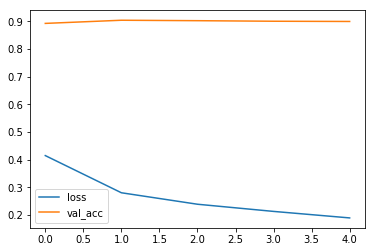

In [23]:
# Plotting the accuracy metrics
plt.plot(training_history.history['loss'], label='loss')
plt.plot(training_history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

# Loading the model and making predition

In [24]:
img = X_test[4].reshape([28,28])

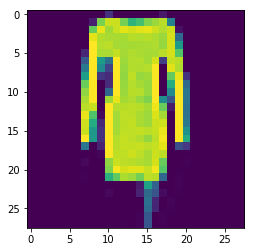

In [25]:
# Check above for its label, 3
plt.imshow(img)

In [26]:
# deleting the model and reloading it
del model
model = load_model('fashion_mnist.h5')

# Making prediction

In [27]:
# single prediction
probabilities = model.predict_classes(X_test[4].reshape([-1,28,28,1]))

In [28]:
probabilities

array([3])

In [29]:
# batch prediction
probabilities = model.predict_classes(X_test)

In [30]:
predictions = [int(round(x)) for x in probabilities]

In [31]:
# decoding one-hot
np.argmax(y_test, axis=1)

array([0, 1, 2, ..., 8, 8, 1])

In [32]:
accuracy = np.mean(np.equal(predictions, np.argmax(y_test, axis=1)))
print("Accuracy of test set is", accuracy)

Accuracy of test set is 0.8991


In [33]:
# release GPU memory
from keras import backend as K
K.clear_session()